## Importing Libraries

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

## EDA

In [79]:
df = pd.read_csv('amazon_prime_titles.csv')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [81]:
#checking how many null values are in each column
df.isna().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

#### We will Calculate the percentage of missing values in each column (missing_values_count / total_rows * 100).
#### If a column has a very high percentage of missing values (e.g., more than 50-60%), dropping it might be a reasonable choice.

In [82]:
cols_with_missing = [i for i, v in df.isna().sum().items() if v > 0]

In [83]:
# columns with missing values
cols_with_missing

['director', 'cast', 'country', 'date_added', 'rating']

In [84]:
missing_val_percentages = {}

for col in cols_with_missing:
    missing_val_percentages[col] = df[col].isna().sum() / len(df) * 100

missing_val_percentages

{'director': 21.54530409598676,
 'cast': 12.753413322300371,
 'country': 93.04923458833264,
 'date_added': 98.39677285891601,
 'rating': 3.485726106743897}

#### Now we should drop the country and date_added columns, the had the highest percentages of missing values.

In [85]:
df = df.drop(['country', 'date_added'], axis=1)

In [90]:
df.isna().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [97]:
df['rating'].unique()

array([nan, '13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+',
       'TV-PG', '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G',
       'PG', 'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE'], dtype=object)

In [98]:
df['rating'].mode()

0    13+
Name: rating, dtype: object

In [88]:
df['type'].value_counts()

type
Movie      7814
TV Show    1854
Name: count, dtype: int64

<Axes: >

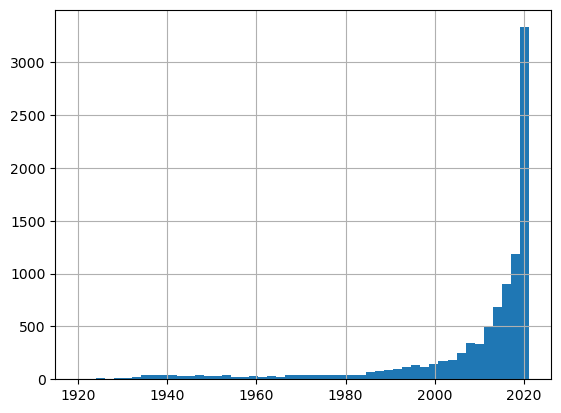

In [89]:
df['release_year'].hist(bins=50)